# HW 1 - Diagnostic (Due April 3, 2018)

In [1]:
import pandas as pd
from datetime import datetime

In [54]:
%run util.py
%matplotlib inline

In [3]:
combined = combine_data(start='01/01/2017', end='12/31/2017')

## Problem 1: Summary Statistics
- Number of requests of each type (and subtype within each of types) over time, neighborhood, response time, and city

### How many 311 Requests of each type?

In [4]:
combined['Type Of Service Request'].value_counts()

Graffiti Removal             112741
Alley Light Out               27887
Vacant/Abandoned Building      3665
Name: Type Of Service Request, dtype: int64

#### Interesting Observation 1 & 2: 
- Vacant/Abandoned Buildings appear concentrated on the south side, consistent with the abandoning of buildings and condominiums following the 2008 housing bubble.
- Graffiti Removal is more concentrated in the north, perhaps due to higher enforcement of "Quality of Life" crimes in the more affluent neighborhoods.

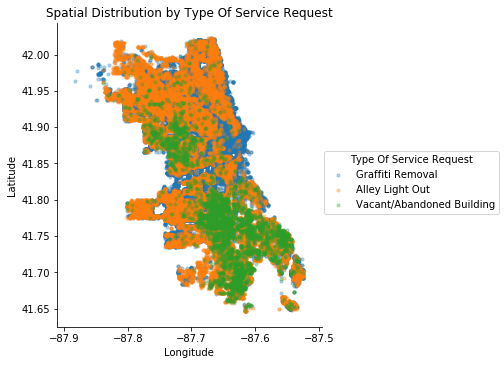

In [5]:
scatter_map(combined)

### Graffiti Removal Requests

In [6]:
graffiti = combined[combined['Type Of Service Request'] == 'Graffiti Removal']

#### Interesting Observation 3:
- Looks like there are fewer graffiti requests during the summer. People are vacationing and/or have better things to do than make Graffiti Removal requests.

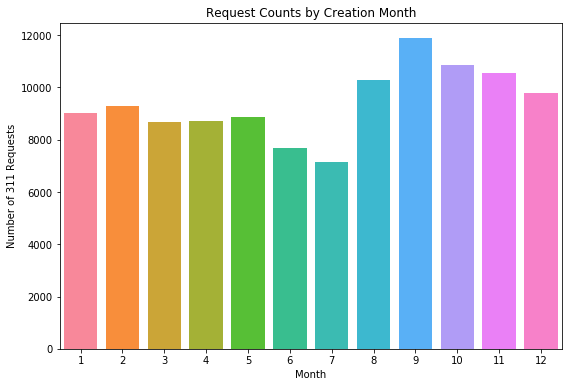

In [7]:
col_to_hist(graffiti, 'Creation Month', 'Month', vertical=False, sort=False)

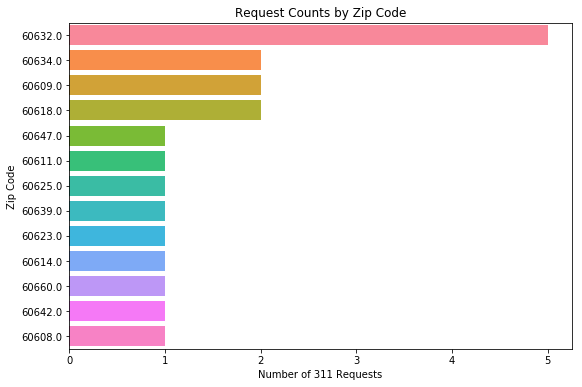

In [8]:
col_to_hist(graffiti.head(20), 'Zip Code', label='Zip Code', vertical=True, sort=True)

In [9]:
graffiti['Where Is The Graffiti Located?'].value_counts().head(5)

Front     32553
Side      14863
Pole      13002
Garage     7989
Rear       6777
Name: Where Is The Graffiti Located?, dtype: int64

In [10]:
graffiti['What Type Of Surface Is The Graffiti On?'].value_counts().head(5)

Metal - Painted                         40314
Brick - Unpainted                       19478
Brick - Painted                         14626
Metal - Unpainted                        9959
Cement (Sidewalk, Alley, Wall, Curb)     9215
Name: What Type Of Surface Is The Graffiti On?, dtype: int64

In [11]:
graffiti['Response Time'].describe()

count                    112735
mean     0 days 16:14:00.228855
std      1 days 02:55:16.577735
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             1 days 00:00:00
max            56 days 00:00:00
Name: Response Time, dtype: object

### Alley Lights Out

In [12]:
alo = combined[combined['Type Of Service Request'] == 'Alley Light Out']

#### Interesting Observation 4:
- There is a MUCH longer response time for alley light out than graffiti. Mean wait time for graffiti is 0 days, while you would have to wait an average of 33 days for the city to respond to an alley light out. 

In [13]:
alo['Response Time'].describe()

count                      24084
mean     33 days 17:03:15.515695
std      46 days 18:03:37.520005
min              0 days 00:00:00
25%              2 days 00:00:00
50%             14 days 00:00:00
75%             48 days 00:00:00
max            403 days 00:00:00
Name: Response Time, dtype: object

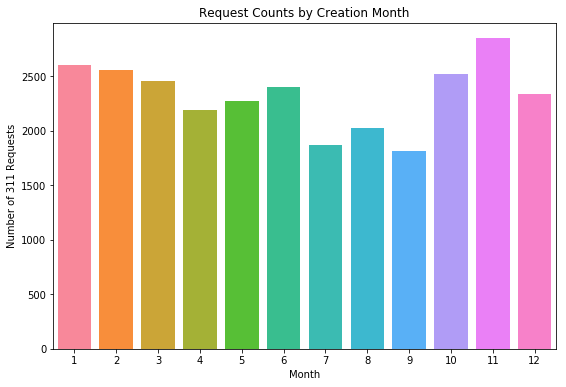

In [14]:
col_to_hist(alo, 'Creation Month', 'Month', vertical=False, sort=False)

### Vacant/Abandoned Buildings

#### Interesting Observation 5:
- Approximately 40% of reported abandoned buildings were being used by people (homeless, children, gangs). I would have expected higher.

In [15]:
vacant = combined[combined['Type Of Service Request'] == 'Vacant/Abandoned Building']

In [16]:
vacant['Is Building Open Or Boarded?'].value_counts(normalize=True)

Open       0.811847
Boarded    0.188153
Name: Is Building Open Or Boarded?, dtype: float64

In [18]:
vacant['Is The Building Vacant Due To Fire?'].value_counts(normalize=True)

False    0.901395
True     0.098605
Name: Is The Building Vacant Due To Fire?, dtype: float64

In [19]:
vacant['Any People Using Property? (Homeless, Childen, Gangs)'].value_counts(normalize=True)

False    0.597522
True     0.402478
Name: Any People Using Property? (Homeless, Childen, Gangs), dtype: float64

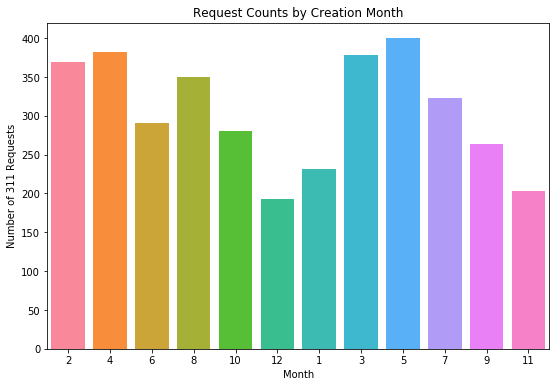

In [20]:
col_to_hist(vacant, 'Creation Month', 'Month', vertical=False, sort=False)

## Problem 2: Data Augmentation and APIs

In [21]:
threemo = abridged_data()

In [22]:
threemo['Type Of Service Request'].value_counts()

Alley Light Out              9519
Vacant/Abandoned Building     940
Name: Type Of Service Request, dtype: int64

In [23]:
final = generate_FIPS(threemo)

In [31]:
final = final.set_index('FIPS Block Number')

In [24]:
census_data = scrape_census_tract()

In [29]:
census_data.head()

,Tract Name,Percent White,Percent English Only,Income,Family Size,State,County
Tract,,,,,,,
010100,"Census Tract 101, Cook County, Illinois",53.2,81.4,2208,2.83,17,031
010201,"Census Tract 102.01, Cook County, Illinois",46.9,57.1,2619,3.46,17,031
010202,"Census Tract 102.02, Cook County, Illinois",51.1,60.8,1022,3.18,17,031
010300,"Census Tract 103, Cook County, Illinois",57.2,62.2,2739,2.99,17,031
010400,"Census Tract 104, Cook County, Illinois",74.7,80.4,1869,2.96,17,031


In [32]:
block = join_df(final, census_data)

#### What type of blocks get alley light out reported?

In [56]:
for var in ['Percent White', 'Percent English Only', 'Income', 'Family Size']:
    print(var)
    print(demographic_stats(block, 'Alley Light Out', var))
    print()

Percent White
          count       mean
Zip Code                  
60629.0   765.0  42.031895
60620.0   454.0   0.905947
60638.0   447.0  71.718568
60628.0   445.0   5.550337
60619.0   444.0   1.286486
60617.0   425.0  30.931059
60632.0   368.0  57.263043
60634.0   364.0  78.328571
60651.0   344.0  13.542151
60643.0   342.0  12.071930

Percent English Only
          count       mean
Zip Code                  
60629.0   765.0  32.451503
60620.0   454.0  97.778194
60638.0   447.0  58.987025
60628.0   445.0  93.547865
60619.0   444.0  95.273874
60617.0   425.0  70.877176
60632.0   368.0  17.443478
60634.0   364.0  40.462088
60651.0   344.0  69.864244
60643.0   342.0  97.460819

Income
          count         mean
Zip Code                    
60629.0   765.0  1497.077124
60638.0   464.0  1697.790948
60620.0   454.0  1421.189427
60628.0   445.0  1295.476404
60619.0   444.0  1348.601351
60617.0   425.0  1423.277647
60632.0   368.0  1080.747283
60634.0   364.0  1796.387363
60651.0   344.0  1

#### What type of blocks get vacant and abandoned buildings reported?

In [35]:
for var in ['Percent White', 'Percent English Only', 'Income', 'Family Size']:
    print(var)
    print(demographic_stats(block, 'Vacant/Abandoned Building', var))
    print()

Percent White
          count       mean
Zip Code                  
60628.0   126.0   1.530159
60619.0    97.0   1.048454
60636.0    85.0   1.511765
60621.0    78.0   1.446154
60620.0    75.0   1.201333
60617.0    68.0  22.701471
60609.0    50.0  34.938000
60643.0    43.0   7.558140
60624.0    42.0   2.616667
60637.0    34.0   1.144118

Percent English Only
          count       mean
Zip Code                  
60628.0   126.0  97.454762
60619.0    97.0  95.919588
60636.0    85.0  95.625882
60621.0    78.0  96.148718
60620.0    75.0  97.740000
60617.0    68.0  72.638235
60609.0    50.0  55.620000
60643.0    43.0  98.046512
60624.0    42.0  97.111905
60637.0    34.0  95.894118

Income
          count         mean
Zip Code                    
60628.0   126.0  1213.777778
60619.0    97.0  1347.175258
60636.0    85.0   578.835294
60621.0    78.0   884.551282
60620.0    75.0  1196.066667
60617.0    68.0  1237.073529
60609.0    50.0   646.800000
60643.0    43.0  1475.302326
60624.0    42.0   

## Problem 3

Assume you are running the 311 call center for Chicago. You get a call from 3600 W Roosevelt Ave.

A. Of the three types of requests you have data for, which request type is the most likely given the call came from 3600 W Roosevelt Ave? What are the probabilities for each type of request?
- Given all the 311 requests from 3600 W Roosevelt are graffiti, the conditional probability that a request from that address is a Graffiti Removal is one. We cannot say anything about any other types of requests.


In [36]:
combined[combined['Street Address'].str.contains("3600 W Roosevelt", case=False)]

,"Any People Using Property? (Homeless, Childen, Gangs)",Community Area,Completion Date,Creation Date,"If The Building Is Open, Where Is The Entry Point?",Is Building Open Or Boarded?,Is The Building Currently Vacant Or Occupied?,Is The Building Dangerous Or Hazardous?,Is The Building Vacant Due To Fire?,Latitude,...,Street Address,Type Of Service Request,Ward,What Type Of Surface Is The Graffiti On?,Where Is The Graffiti Located?,X Coordinate,Y Coordinate,Zip Code,Response Time,Creation Month
918132,NaN,29.0,2017-10-23,2017-10-23,NaN,NaN,NaN,NaN,NaN,41.866399,...,3600 W ROOSEVELT RD,Graffiti Removal,24.0,Metal - Unpainted,Traffic Control Box,1.152558e+06,1.894472e+06,60624.0,0 days,10


B. Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?
- Based on the number of requests for removal of graffiti from Garfield Park and Uptown in 2017, it seems 2.5% more likely that a graffiti removal request came from Uptown.

In [51]:
garfield_park = graffiti[(graffiti['Zip Code'] == 60612) | (graffiti['Zip Code'] == 60624)]
uptown = graffiti[(graffiti['Zip Code'] == 60640) | (graffiti['Zip Code'] == 60613)]
gp = garfield_park.shape[0] / graffiti.shape[0]
up = uptown.shape[0] / graffiti.shape[0]
difference = up - gp
print('{}% of graffiti removal requests came from Garfield Park, while {}% of them came from Uptown, resulting in a {}% difference.'.format(gp*100, up*100, difference*100))

2.0054815905482477% of graffiti removal requests came from Garfield Park, while 4.541382460684224% of them came from Uptown, resulting in a 2.5359008701359755% difference.


C. Now assume that you don’t have access to all the raw data and you know the following things:
- There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown.
- Of the 600 calls from Garfield Park, 100 of them are about Graffiti Removal.
- Of the 400 calls from Uptown, 160 are about Graffiti Removal. If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Garfield Park versus Uptown?

In [53]:
up_call = 400/1000
gp_call = 600/1000

up_graffiti = 160/400
gp_graffiti = 100/600

up_prob = (up_call * up_graffiti) / ((gp_call * gp_graffiti) + (up_call * up_graffiti))
gp_prob = (gp_call * gp_graffiti) / ((gp_call * gp_graffiti) + (up_call * up_graffiti))

difference = up_prob - gp_prob

print('The probability that a graffiti call came from Uptown is {}%, \
while the probability that it came from Garfield Park is {}%, \
for a difference of {}%.'.format(up_prob * 100, gp_prob * 100, difference * 100))

The probability that a graffiti call came from Uptown is 61.538461538461554%, while the probability that it came from Garfield Park is 38.46153846153846%, for a difference of 23.076923076923094%.
